In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import calendar as cal

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, Column, Integer, String, Float, Date
from sqlalchemy.sql import label

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
inspector = inspect(engine)


# reflect the tables
inspector.get_table_names()

['measurement', 'station']

In [6]:
# View all of the classes that automap found
Base = automap_base()
Base.prepare(engine, reflect=True)

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
Recent_Date = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()
Recent_Date

('2017-08-23')

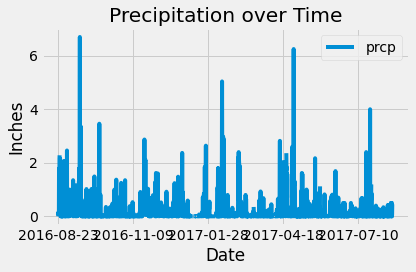

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the date and precipitation scores
Prcp_data = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date <= '2017-08-23').\
        filter(Measurement.date >= '2016-08-23').\
        order_by(Measurement.date)

# Save the query results as a Pandas DataFrame and set the index to the date column
Prcp_data_df = pd.DataFrame(Prcp_data[:], columns=['date', 'prcp'])
Prcp_data_df.set_index('date', inplace=True, )
Prcp_data_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
Prcp_data_df.plot(title="Precipitation over Time")
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.show()



In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Summary = Prcp_data_df.describe()
Summary

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
Stations = session.query(Station.station).distinct(Station.station).count()
print(f'There are {Stations} stations')

There are 9 stations


In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.Measurement
Active_Stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).all()
Active_Stations

[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
USC00519281_max= session.query(func.max(Measurement.tobs)).filter(Measurement.station =="USC00519281").all()
USC00519281_max
USC00519281_min= session.query(func.min(Measurement.tobs)).filter(Measurement.station =="USC00519281").all()
USC00519281_min
USC00519281_ave= session.query(func.avg(Measurement.tobs)).filter(Measurement.station =="USC00519281").all()
USC00519281_ave

print(f'Station USC00519281 has an average temp of {USC00519281_ave}, a high temp of {USC00519281_max}, and a low temp of {USC00519281_min}')

Station USC00519281 has an average temp of [(71.66378066378067,)], a high temp of [(85.0,)], and a low temp of [(54.0,)]


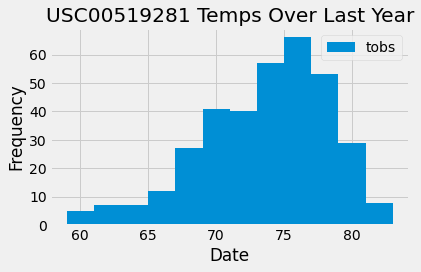

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
USC00519281_temp_data = session.query(Measurement.date, Measurement.tobs).\
                        filter(Measurement.station =="USC00519281").\
                        filter(Measurement.date <= '2017-08-23').\
                        filter(Measurement.date >= '2016-08-23').\
                        order_by(Measurement.date).all()
USC00519281_temp_data

# Save the query results as a Pandas DataFrame and set the index to the date column
USC00519281_data_df = pd.DataFrame(USC00519281_temp_data[:], columns=['date', 'tobs'])
USC00519281_data_df.set_index('date', inplace=True, )
USC00519281_data_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
USC00519281_data_df.plot.hist(bins=12,title="USC00519281 Temps Over Last Year")
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Close session

In [16]:
# Close Session
session.close()